In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
feeder_data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv',
    col_types = cols()
)

In [5]:
# feeder_data |> head()
# glimpse() requires a tibble dataframe
#as_tibble() function can convert dataframe to tibble
#Ex. feeder_data |> as_tibble() |> glimpse()
feeder_data |> glimpse() #gives a more compact view of dataset, as long as you use read_csv() function -- doesn't work with read.csv()

Rows: 100,000
Columns: 22
$ loc_id             <chr> "L981010", "L3161698", "L13210778", "L13258348", "L…
$ latitude           <dbl> 52.12976, 43.83221, 39.72147, 42.21787, 32.74992, 4…
$ longitude          <dbl> -122.13547, -123.09240, -75.93366, -83.67230, -79.9…
$ subnational1_code  <chr> "CA-BC", "US-OR", "US-MD", "US-MI", "US-SC", "CA-QC…
$ entry_technique    <chr> "POSTCODE LAT/LONG LOOKUP", "/GOOGLE_MAP/ZOOM:18", …
$ sub_id             <chr> "S83206450", "S78031190", "S81318993", "S79251313",…
$ obs_id             <chr> "OBS1092604618", "OBS1036509564", "OBS1073386105", …
$ Month              <dbl> 3, 12, 2, 1, 1, 3, 1, 4, 11, 1, 1, 4, 3, 11, 1, 2, …
$ Day                <dbl> 4, 19, 13, 13, 11, 13, 23, 23, 28, 2, 30, 22, 25, 1…
$ Year               <dbl> 2021, 2020, 2021, 2021, 2021, 2021, 2021, 2021, 202…
$ PROJ_PERIOD_ID     <chr> "PFW_2021", "PFW_2021", "PFW_2021", "PFW_2021", "PF…
$ species_code       <chr> "amegfi", "moudov", "tuftit", "houspa", "balori", "…
$ how_many    

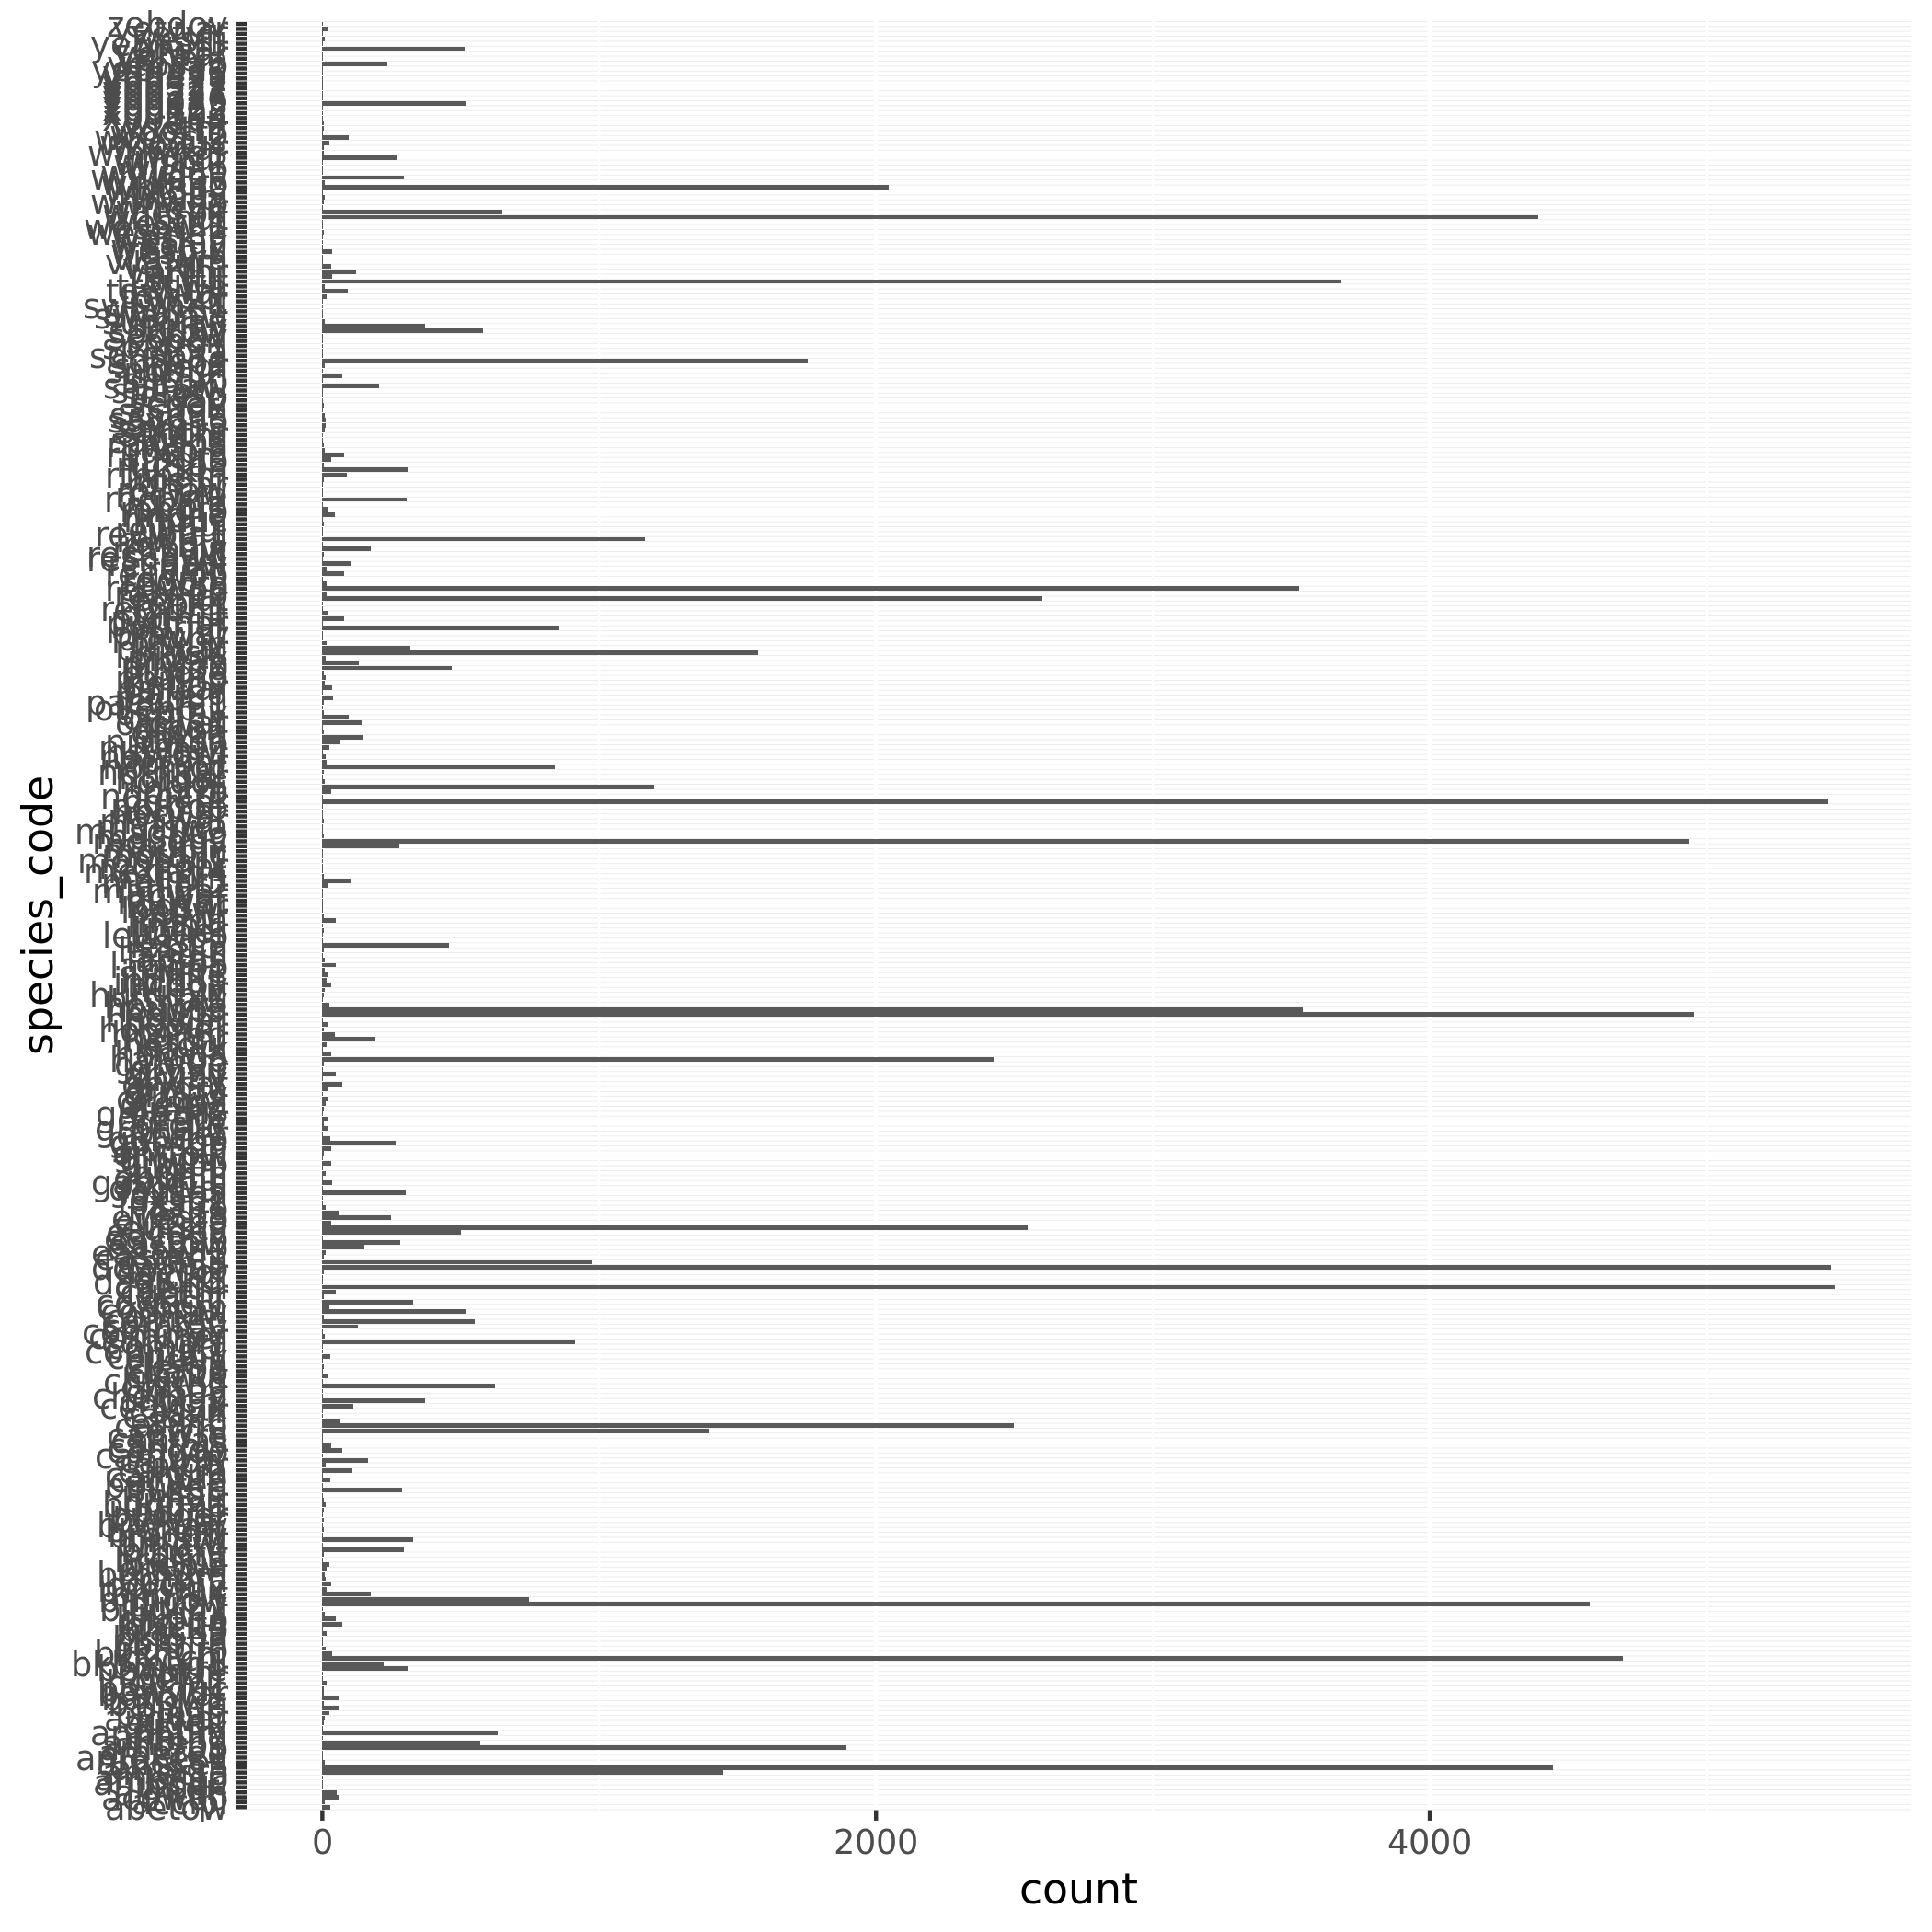

In [10]:
options(repr.plot.res = 300)
p = ggplot(feeder_data, aes(y = species_code)) + geom_bar()
p

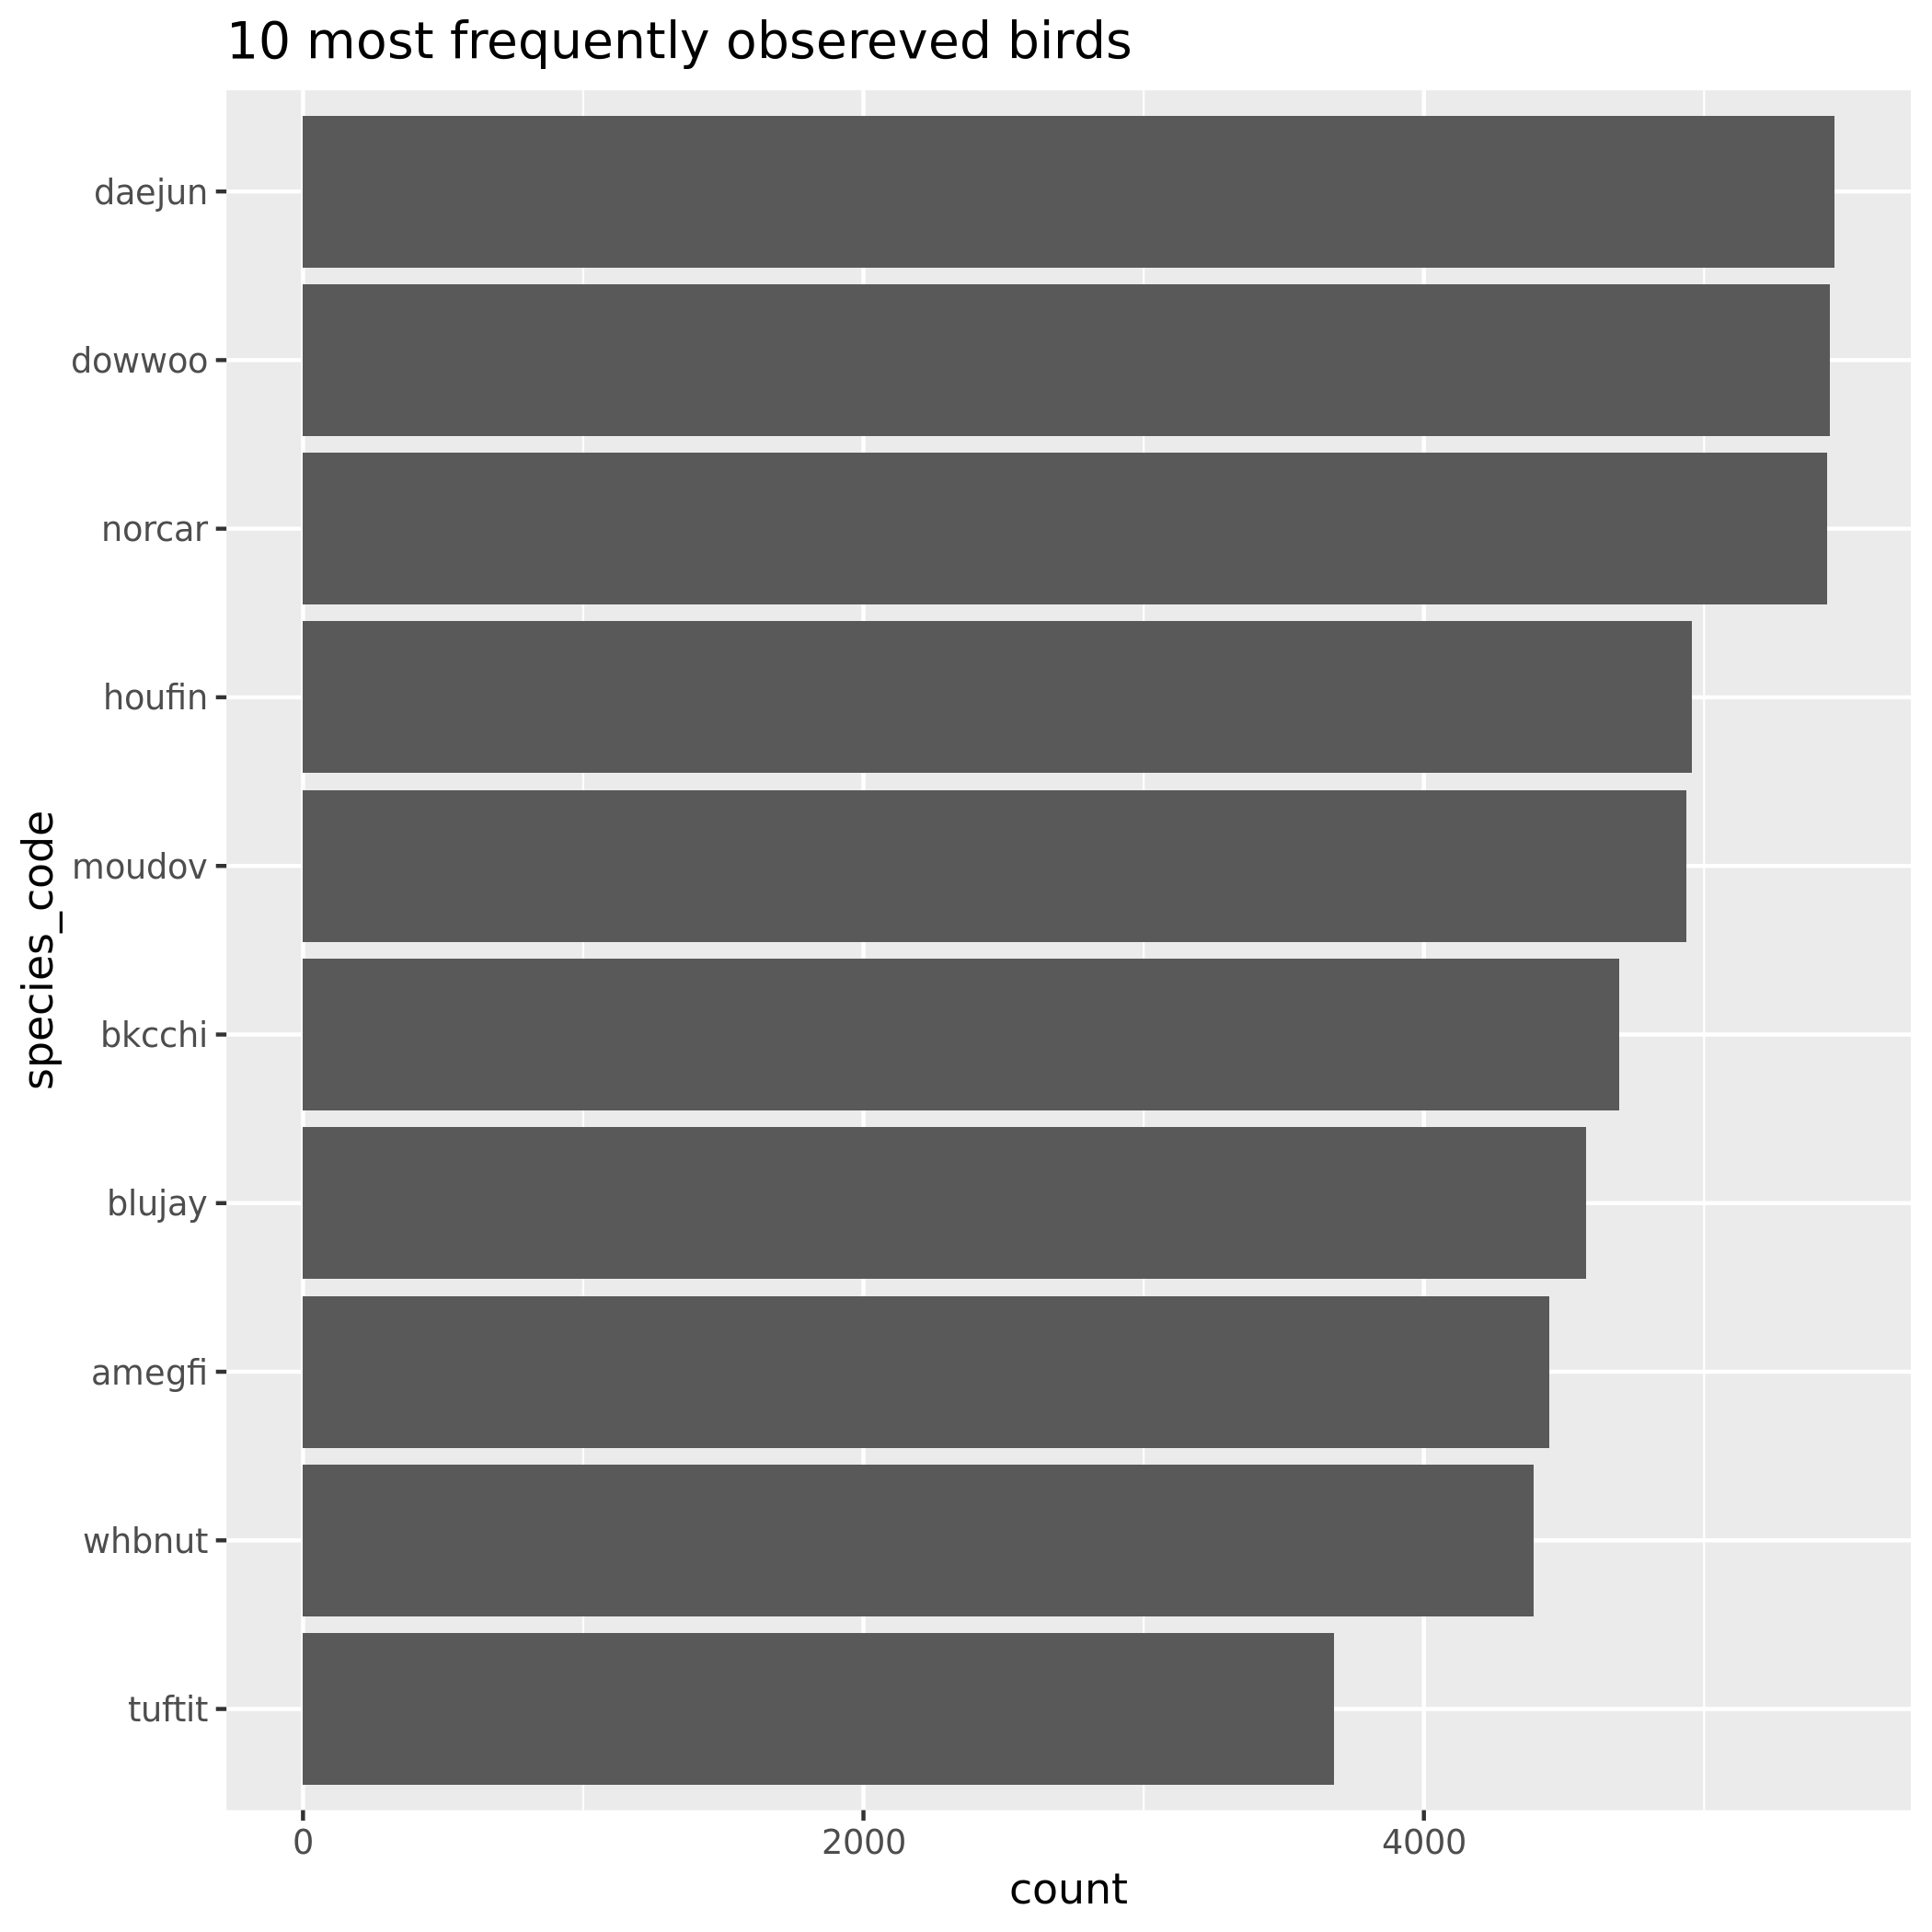

In [15]:
feeder_data2 = feeder_data |>
    mutate(species_code = fct_lump(species_code, n=10) |> fct_infreq() |> fct_rev()) |>
    filter(species_code != 'Other')

p = ggplot(feeder_data2, aes(y = species_code)) + geom_bar() + ggtitle('10 most frequently obsereved birds')
p